### import the packages

In [1]:

import os
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import time 
from jax.scipy.special import logsumexp
import numpy as np
from sharpy.smc_functions import run_sharpy

/Users/gabrieledemasi/dottorato/GIT-repo/sharpy_dev/sharpy/sharpy/utils.py:93: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  leaps = np.array([
/Users/gabrieledemasi/miniconda3/envs/newenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


∣NK⟩ Tip: To build H|ψ⟩ use nk.vqs.apply_operator(H, vstate_ψ).

### Define the model

In [2]:
from sharpy.test_distributions import bimodal_gaussian_mixture

dimensions     = 11
log_likelihood = bimodal_gaussian_mixture(mean_1=-1., mean_2=1., sigma=0.01, weight=0.5, dimensions=dimensions)

def prior(params):
    return 0.

### Tune SMC and NUTS parameters

In [3]:
prior_bounds            = jnp.array([[-5, 5] for _ in range(dimensions)])
boundary_conditions     = jnp.array([0 for _ in range(dimensions)])  #0 for reflective, 1 for circular

number_of_particles     = 9000

#step size of the NUTS
step_size               = 0.3 

# Fraction of effective particles to be manteined troughout the run. 
alpha                   = 0.95 
seed                    = 42

folder                  = f"Gaussian_mixture_example"
label                   = f"SHARPy_run"

### run SHARPy

In [4]:
start = time.time()
result_dict     = run_sharpy(   log_likelihood,
                                prior,
                                prior_bounds,
                                boundary_conditions,
                                alpha,
                                number_of_particles,
                                step_size,
                                master_key=jax.random.PRNGKey(jnp.array(2)),
                                folder = folder,
                                                    )

sampling_time = time.time()-start

# Finally, some postprocessing

the total number of samples is: 26072
The total sampling time is  = 32.711989879608154


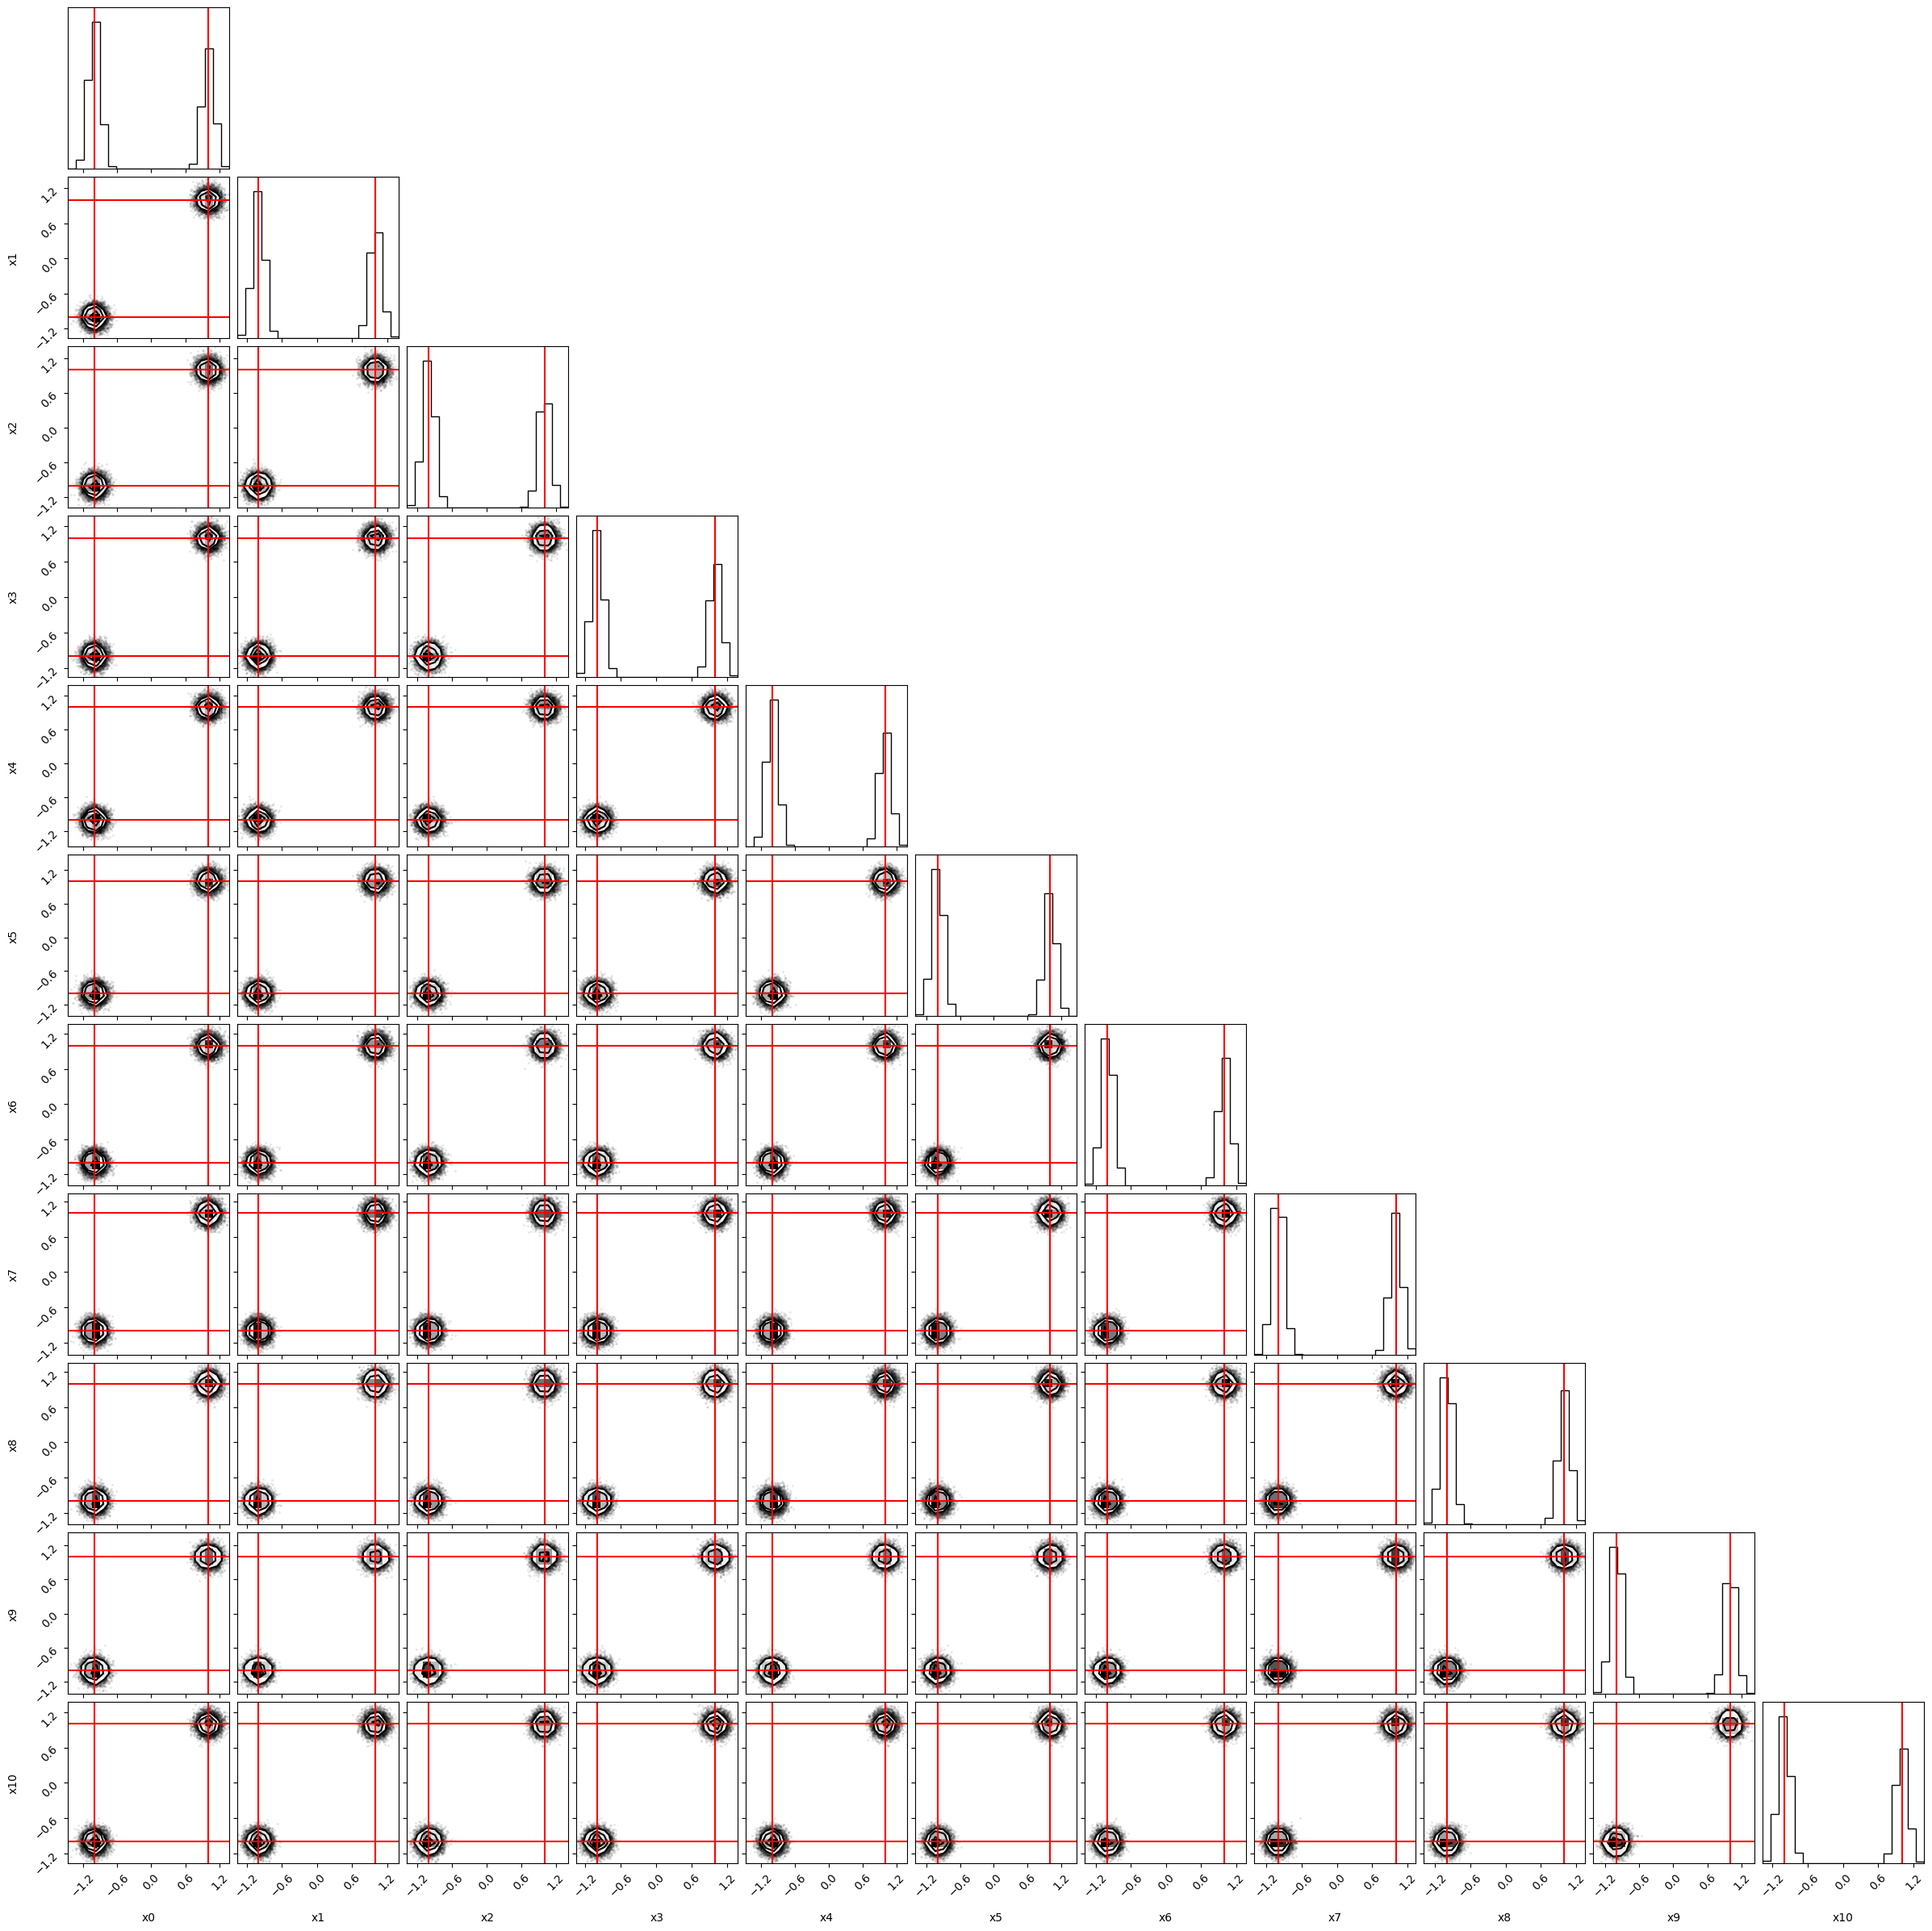

In [8]:
samples     = result_dict['posterior_samples']
print("the total number of samples is:", len(samples))

labels = [f"x{i}" for i in range(dimensions)]
import corner
fig = corner.corner(np.array(samples),labels=labels)
corner.overplot_lines(  fig,
                        jnp.ones(dimensions),
                        color="red", ls="-"
                    )
corner.overplot_lines(  fig,
                        -jnp.ones(dimensions),
                        color="red", ls="-"
                    )   


fig.savefig(f"{folder}/{label}_corner.png")

print("The total sampling time is  = {}".format(sampling_time))